In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Define column names based on the dataset description
column_names = [
    "ID", "Diagnosis",
    "Radius Mean", "Texture Mean", "Perimeter Mean", "Area Mean", "Smoothness Mean",
    "Compactness Mean", "Concavity Mean", "Concave Points Mean", "Symmetry Mean", "Fractal Dimension Mean",
    "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE",
    "Compactness SE", "Concavity SE", "Concave Points SE", "Symmetry SE", "Fractal Dimension SE",
    "Radius Worst", "Texture Worst", "Perimeter Worst", "Area Worst", "Smoothness Worst",
    "Compactness Worst", "Concavity Worst", "Concave Points Worst", "Symmetry Worst", "Fractal Dimension Worst"
]

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None, names=column_names)

In [4]:
df.head()

,ID,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
def summary_stats(df):
    summary = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values
    })
    
    shape_info = f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns"
    
    desc = df.describe().transpose()
    
    print("\n" + "="*100)
    print(shape_info)
    print("="*100)
    
    print("\nSummary Statistics:\n")
    print(summary.to_string(index=False))
    print("="*100)

    print("\nDescriptive Statistics:\n")
    print(desc.to_string())
    print("="*100)

In [6]:
summary_stats(df)


Dataset Shape: 569 rows × 32 columns

Summary Statistics:

            Column Name Data Type  Missing Values  Unique Values
                     ID     int64               0            569
              Diagnosis    object               0              2
            Radius Mean   float64               0            456
           Texture Mean   float64               0            479
         Perimeter Mean   float64               0            522
              Area Mean   float64               0            539
        Smoothness Mean   float64               0            474
       Compactness Mean   float64               0            537
         Concavity Mean   float64               0            537
    Concave Points Mean   float64               0            542
          Symmetry Mean   float64               0            432
 Fractal Dimension Mean   float64               0            499
              Radius SE   float64               0            540
             Texture SE   floa

In [7]:
# Convert 'M' to 1 and 'B' to 0
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0}).astype(int)
print(df['Diagnosis'].unique()) 
print(df['Diagnosis'].value_counts()) 

[1 0]
Diagnosis
0    357
1    212
Name: count, dtype: int64


In [24]:
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, cross_validate, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, matthews_corrcoef,
    confusion_matrix, classification_report, roc_curve, precision_recall_curve, make_scorer

)


In [9]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Define models and hyperparameter grids
model_params = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(class_weight='balanced', random_state=42),
        "params": {"max_depth": [3, 5, 7], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4], "criterion": ["gini", "entropy"]},
        "use_scaled": False
    },
    "k-NN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 4,  5, 7, 10], "weights": ["uniform", "distance"], 'algorithm': ['auto', 'ball_tree', 'kd_tree'],'metric': ['minkowski', 'manhattan', 'euclidean']},
        "use_scaled": True
    },
    "Logistic Regression": {
        "model": LogisticRegression(class_weight='balanced', random_state=42),
        "params": {"C": [0.1, 1, 10], "penalty": ["l2"], 'max_iter': [100, 200, 500], 'solver': ['lbfgs', 'liblinear']},
        "use_scaled": True
    },
    "SVM": {
        "model": SVC( class_weight='balanced', probability=True, random_state=42),
        "params": {"C": [0.001,0.1, 1, 10, 100], 'kernel': ['linear','rbf'],'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'shrinking': [True, False]},
        "use_scaled": True
    }
}


 Nested CV Results with Best Parameters:

                    Mean Recall Std Recall
Decision Tree          0.911586   0.041343
k-NN                   0.917291    0.03881
Logistic Regression    0.952585   0.014714
SVM                         0.8        0.4
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'shrinking': True}


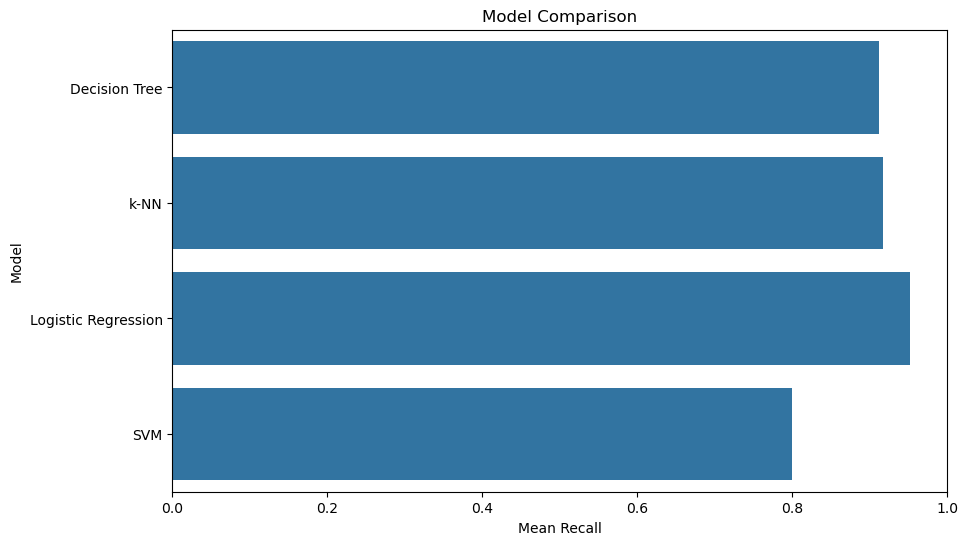

In [28]:
# Outer CV for unbiased model selection
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

nested_cv_results = {}

for name, mp in model_params.items():
    model = mp["model"]
    param_grid = mp["params"]
    data = mp["use_scaled"]
    
    X_train_used = X_train_scaled if data else X_train

    # Inner CV for hyperparameter tuning
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='recall', n_jobs=-1, return_train_score=True)
    
    # Performing Nested CV
    nested_scores = cross_val_score(grid_search, X_train_used, y_train, cv=outer_cv, scoring='recall', n_jobs=-1)
    grid_search.fit(X_train_used, y_train)

    nested_cv_results[name] = {
        "Mean Recall": nested_scores.mean(),
        "Std Recall": nested_scores.std(),
        "Best Parameters": grid_search.best_params_  
    }

nested_results_df = pd.DataFrame(nested_cv_results).T

print("\n Nested CV Results with Best Parameters:\n")
print(nested_results_df[['Mean Recall','Std Recall']])
print("="*100)
for i in range(len(nested_results_df)):
    print(nested_results_df['Best Parameters'].iloc[i])
print("="*100)

# model comparison graph
plt.figure(figsize=(10, 6))
sns.barplot(data=nested_results_df, x='Mean Recall', y=nested_results_df.index)
plt.xlabel('Mean Recall')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.show()

In [ ]:
# model comparison graph

plt.figure(figsize=(10, 6))
sns.barplot(data=nested_results_df, x='Mean Recall', y=nested_results_df.index)
plt.xlabel('Mean Recall')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.show()

In [13]:
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    """
    Evaluates a classification model by:
    - Training on `X_train`
    - Predicting on `X_test`
    - Computing classification metrics
    - Performing cross-validation (if cv > 1)
    - Plotting the learning curve
    - Computing and plotting Lift Curve & Lift Ratio
    """
    # --- Train Model Normally ---
    model.fit(X_train, y_train)  

    # --- Predict on Test Set ---
    y_pred = model.predict(X_test)

    # --- Handle Probability for SVM & Other Models ---
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):  
        y_pred_proba = model.decision_function(X_test)
    else:
        y_pred_proba = None  

    # --- Compute Metrics ---
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # --- Print Classification Report ---
    print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    
    # --- Print Individual Metrics ---
    print("\n Test Set Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc}")  
    
    # --- Print Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # --- Compute and Plot Lift Curve ---
    if y_pred_proba is not None:
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
        lift = precision_vals / (sum(y_test) / len(y_test))
        
        plt.figure(figsize=(8, 6))
        plt.plot(recall_vals, lift, label='Lift Curve', color='blue')
        plt.xlabel('Recall')
        plt.ylabel('Lift')
        plt.title(f'Lift Curve: {model.__class__.__name__}')
        plt.legend()
        plt.grid()
        plt.show()    


    # --- Learning Curve Analysis ---
    if cv > 1:
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='accuracy'
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

        plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s', linestyle='--')
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

        plt.xlabel("Training Set Size")
        plt.ylabel("Accuracy")
        plt.title(f"Learning Curve: {model.__class__.__name__}")
        plt.legend()
        plt.grid()
        plt.show()


In [14]:
best_model_name = nested_results_df['Mean Roc_Auc'].idxmax()
best_params = nested_results_df.loc[best_model_name, "Best Parameters"]

if best_model_name == "k-NN":
    best_model = KNeighborsClassifier(**best_params)
elif best_model_name == "Logistic Regression":
    best_model = LogisticRegression(**best_params, class_weight='balanced',random_state=42)
elif best_model_name == "SVM":
    best_model = SVC(**best_params, probability=True, class_weight='balanced')
elif best_model_name == "Decision Tree":
    best_model = DecisionTreeClassifier(**best_params, class_weight='balanced')

print(f"\n Best Model Selected: {best_model_name}")
print(f" Best Parameters: {best_params}")



 Best Model Selected: Logistic Regression
 Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}



 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


 Test Set Evaluation:
Accuracy: 0.97
Precision: 0.95
Recall: 0.98
F1 Score: 0.97
ROC AUC: 0.9980347199475925


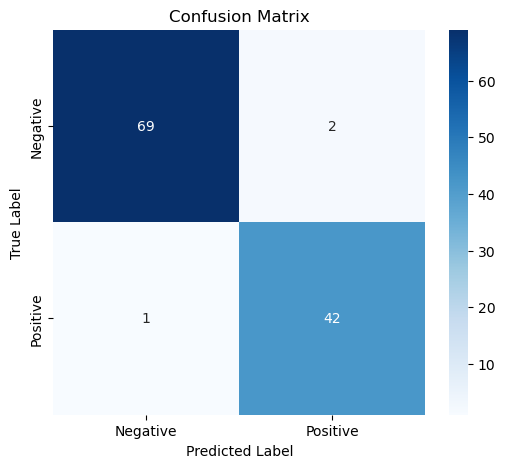

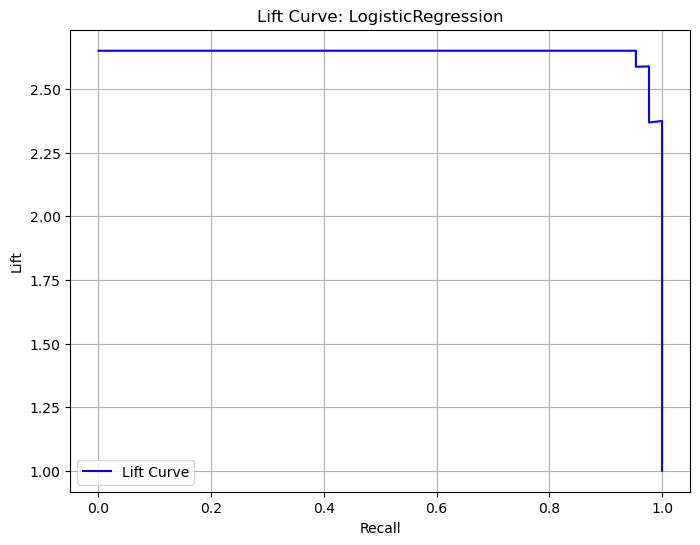

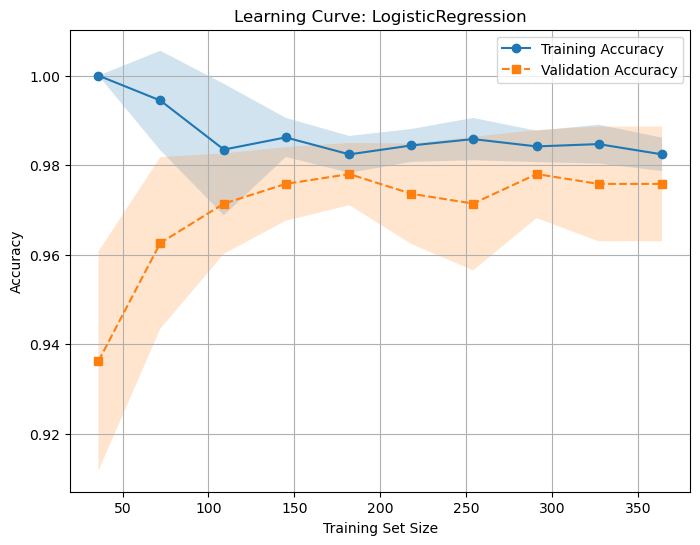

In [15]:
#########################  LOGISTIC REGRESSION  ############################

evaluate_model(best_model, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)


 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


 Test Set Evaluation:
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1 Score: 0.96
ROC AUC: 0.99737962659679


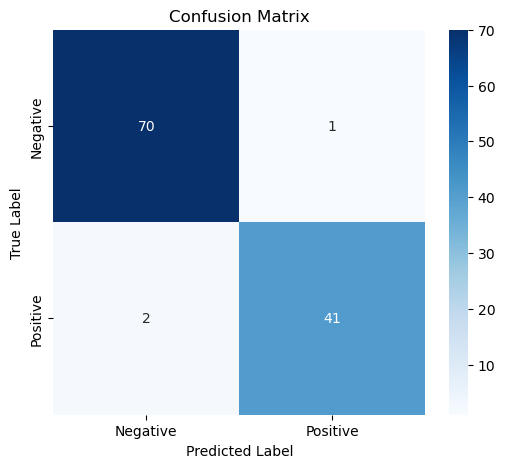

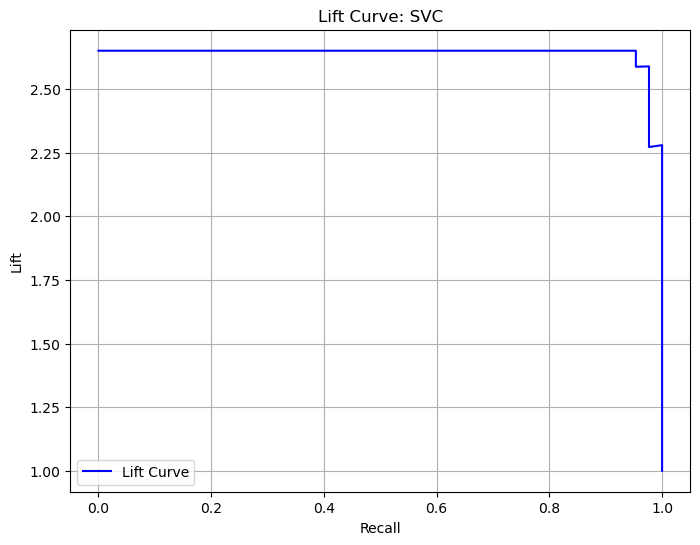

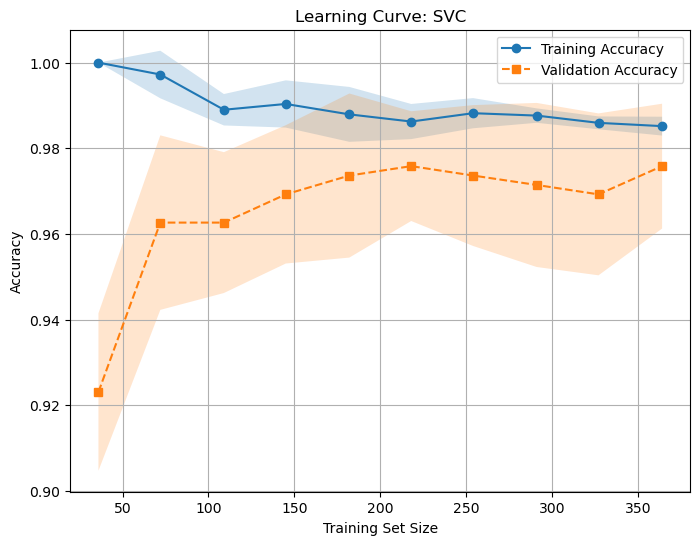

In [16]:
##########################  SVM  ############################

svm = SVC(C=0.1, gamma=1, kernel='linear', shrinking=True, probability=True, class_weight='balanced')
evaluate_model(svm, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)


 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


 Test Set Evaluation:
Accuracy: 0.95
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
ROC AUC: 0.9824762528660334


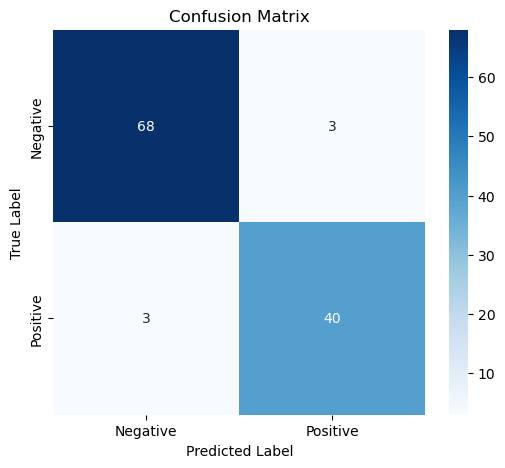

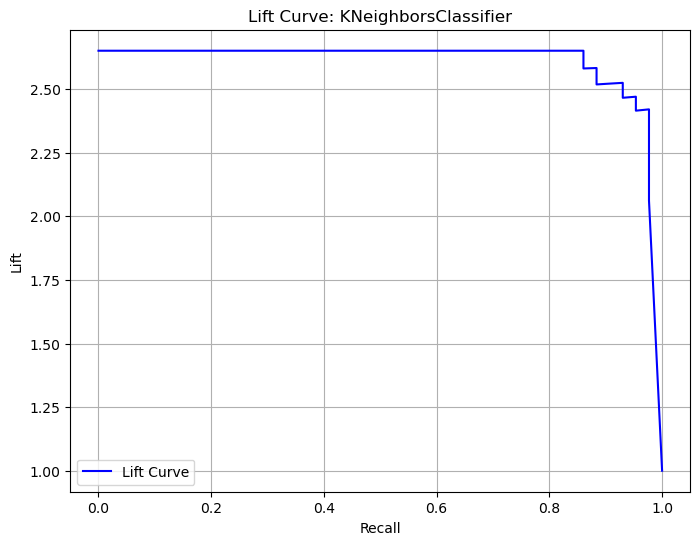

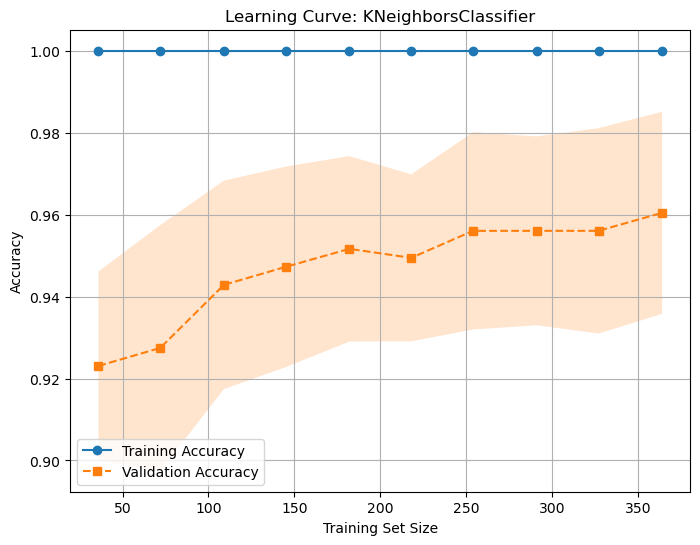

In [17]:
########################  KNN  ############################

knn = KNeighborsClassifier(algorithm='auto', metric='minkowski', n_neighbors=7, weights='distance')
evaluate_model(knn, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)


 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


 Test Set Evaluation:
Accuracy: 0.94
Precision: 0.91
Recall: 0.93
F1 Score: 0.92
ROC AUC: 0.9485751719620045


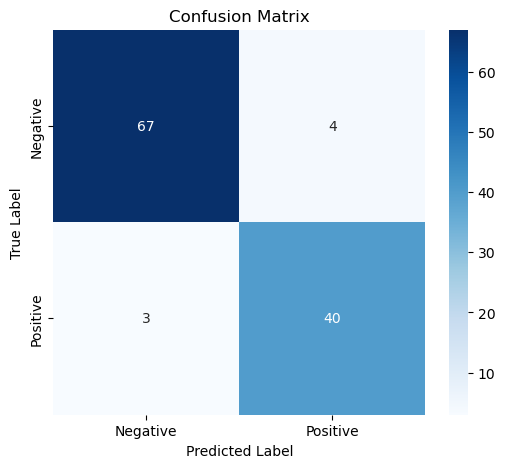

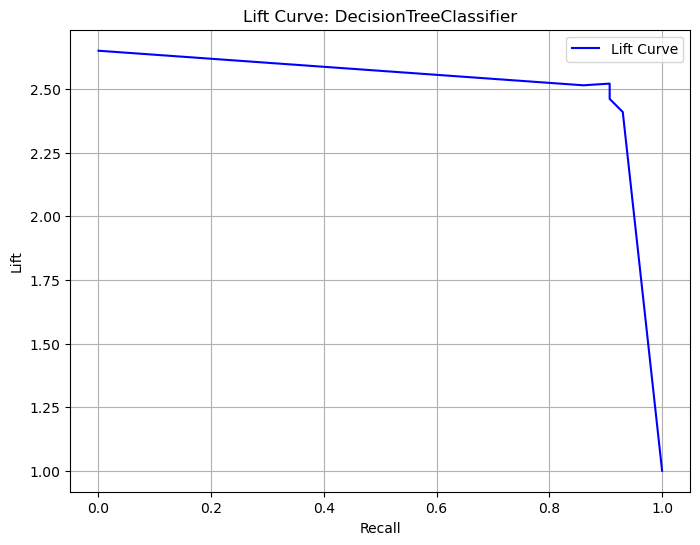

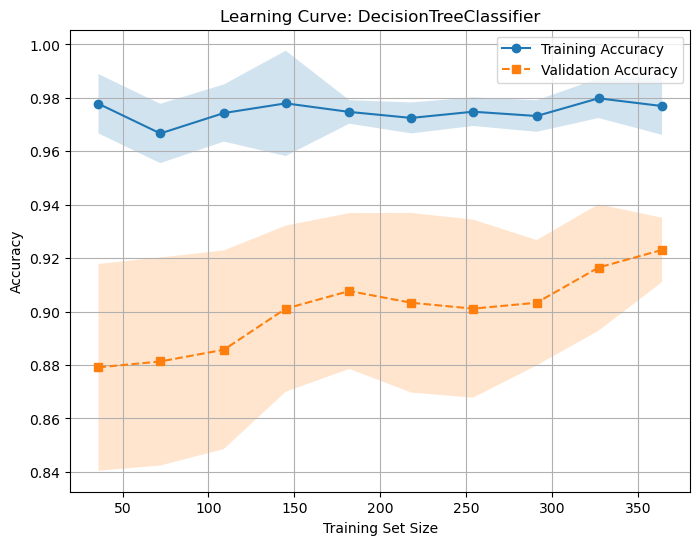

In [18]:
########################  DECISION TREE  ############################

dt = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7, min_samples_leaf=4, min_samples_split=2)
evaluate_model(dt, X_train, y_train, X_test, y_test, cv=5)